In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

The image size for all the frames was 704x1248 during inferencing

Yolov8 DeepOCSORT Tracking

In [14]:
df = pd.read_csv("TestVid2_deepocsort.csv")
df

,num,x,y,h,w
0,0,718,426,13,11
1,1,719,429,14,14
2,2,720,432,15,14
3,3,722,438,14,13
4,4,723,442,16,15
...,...,...,...,...,...
90,90,1015,425,16,16
91,91,1024,430,14,15
92,92,1031,435,16,16
93,93,1040,440,16,16


In [8]:
df2 = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,710,418,15,14,left002001.png,1280,720
1,ball,715,419,16,15,left002002.png,1280,720
2,ball,716,422,15,14,left002003.png,1280,720
3,ball,717,423,15,15,left002004.png,1280,720
4,ball,720,428,15,14,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720
96,ball,1026,430,16,15,left002097.png,1280,720
97,ball,1033,435,17,17,left002098.png,1280,720
98,ball,1043,441,16,14,left002099.png,1280,720


In [16]:
width= df2['bbox_width']
height= df2['bbox_height']

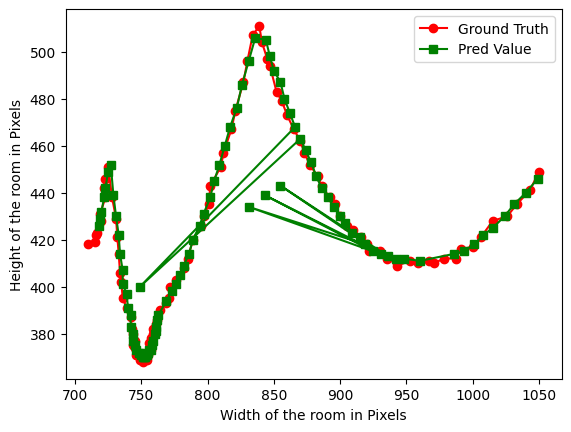

In [15]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df['x']
y2 = df['y']

from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [21]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [22]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)


23.736676605772765


In [20]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


In [8]:
error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)


0.7075611410542334


Yolov8 Stronsort

In [9]:
df3 = pd.read_csv("TestVid2_strongsort.csv")
df3

,x,y,h,w
0,744,377,13,13
1,744,374,14,14
2,745,372,14,14
3,747,371,13,14
4,748,371,14,13
...,...,...,...,...
59,1015,425,15,15
60,1023,429,15,16
61,1031,435,15,15
62,1039,439,17,17


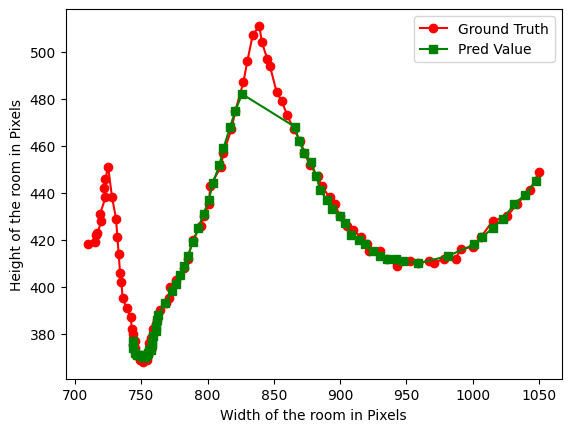

In [10]:
x3=df3['x']
y3 = df3['y']
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x3, y3, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [11]:
count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [12]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates2, ground_coordinates)
print(error)


100.59208982498524


In [13]:
error = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates)
print(error)


2.8563307693159654


yolov8 ocsort Tracking

In [14]:
df4 = pd.read_csv("img1248\TestVid2_ocsort.csv")
df4

,xmin,ymin,width,height
0,718,426,13,11
1,719,429,14,14
2,720,432,15,14
3,722,438,14,13
4,723,442,16,15
...,...,...,...,...
70,1015,425,16,16
71,1024,430,14,15
72,1031,435,16,16
73,1040,440,16,16


In [15]:
x4 = df4['xmin']
y4 = df4['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x4,y4))
    ground_coordinates = list(zip(x1,y1))
    count += 1

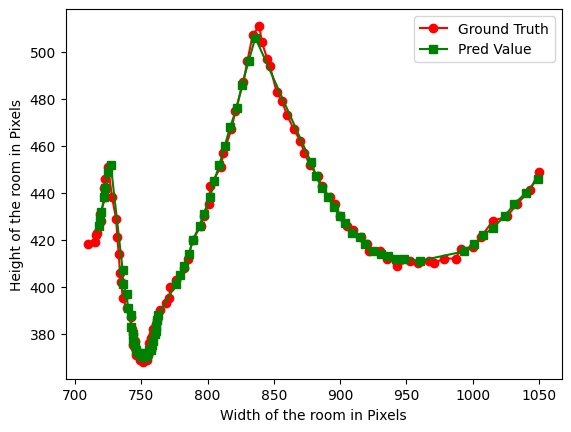

In [16]:
#plot the df4 coordinates along with the ground truth coordinates
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x4, y4, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [17]:
error4 = avg_displacement_error(predicted_coordinates3, ground_coordinates)
error5 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print('ADE for ocsort is:', error4, 'and AMD for ocsort is:', error5)

ADE for ocsort is: 60.970147036527486 and AMD for ocsort is: 1.813511614596996


yolov8 ByteTrack 

In [18]:
df5 = pd.read_csv("img1248\TestVid2_bytetrack.csv")
df5

,xmin,ymin,width,height
0,718.000,426.000,13.00000,11.00000
1,716.707,428.603,16.02810,13.60330
2,717.932,431.191,16.52890,14.06500
3,720.057,436.473,15.76110,13.45360
4,743.600,380.600,13.00000,13.00000
5,743.908,377.825,13.77080,13.77080
6,744.767,375.377,13.27730,13.27730
7,745.801,373.158,13.07610,13.07610
8,746.883,371.806,12.96570,13.01080
9,749.274,371.436,12.29420,12.28110


In [19]:
x5 = df5['xmin']
y5 = df5['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates4 = list(zip(x5,y5))
    ground_coordinates = list(zip(x1,y1))
    count += 1

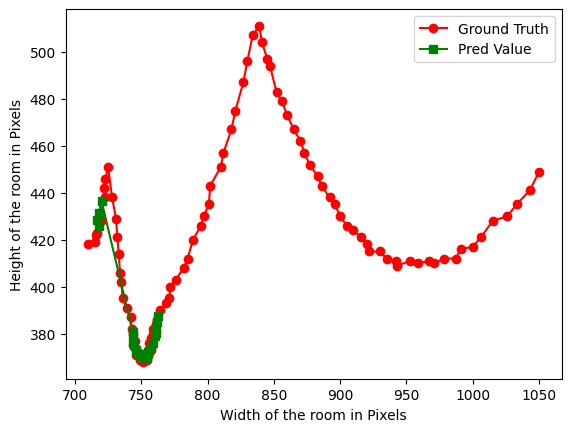

In [20]:
#plot the df5 coordinates along with the ground truth coordinates
from matplotlib import markers 
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x5, y5, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [21]:
error6 = avg_displacement_error(predicted_coordinates4, ground_coordinates)
error7 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates)
print('ADE for bytetrack is:', error6, 'and AMD for bytetrack is:', error7)

ADE for bytetrack is: 37.50397857527765 and AMD for bytetrack is: 2.6553415548645094


yolov8 BotSORT

In [22]:
df6 = pd.read_csv("img1248\TestVid2_botsort.csv")
x6 = df6['xmin']
y6 = df6['ymin']
count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x6,y6))
    ground_coordinates = list(zip(x1,y1))
    count += 1

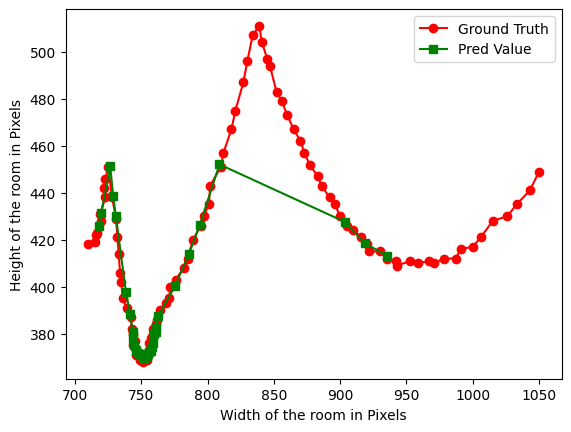

In [23]:
#plot the df6 coordinates along with the ground truth coordinates
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x6, y6, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [24]:
error8 = avg_displacement_error(predicted_coordinates5, ground_coordinates)
error9 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates)
print('ADE for botsort is:', error8, 'and AMD for botsort is:', error9)

ADE for botsort is: 48.28700430541669 and AMD for botsort is: 1.7842545464548163


Moving Average ADE, AMD

In [25]:
df7 = pd.read_csv("TestVid2_deepocsort_smoothedv3.csv", header=None)
df7

,0,1
0,718.000000,426.000000
1,719.000000,429.000000
2,720.333333,433.000000
3,721.666667,437.333333
4,723.333333,443.000000
...,...,...
90,1015.666667,425.666667
91,1023.333333,430.000000
92,1031.666667,435.000000
93,1040.000000,440.333333


In [26]:
x7 = df7[0]
y7 = df7[1]
count = 0
for i in range(len(x1)):
    predicted_coordinates7 = list(zip(x7,y7))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [27]:
error10 = avg_displacement_error(predicted_coordinates7, ground_coordinates)
error11 = avg_mahalanobis_distance(predicted_coordinates7, ground_coordinates)
print('ADE for deepocsort is:', error10, 'and AMD for deepocsort is:', error11)

ADE for deepocsort is: 22.024284416195677 and AMD for deepocsort is: 0.6777362738449211


In [28]:
df8 = pd.read_csv("TestVid2_deepocsort_smoothedv2.csv", header=None)
df8

,0,1
0,718.000000,426.000000
1,719.000000,429.000000
2,720.333333,433.000000
3,721.666667,437.333333
4,723.333333,443.000000
...,...,...
90,1015.666667,425.666667
91,1023.333333,430.000000
92,1031.666667,435.000000
93,1040.000000,440.333333


In [29]:
x8 = df8[0]
y8 = df8[1]
count = 0
for i in range(len(x1)):
    predicted_coordinates8 = list(zip(x8,y8))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [30]:
error12 = avg_displacement_error(predicted_coordinates8, ground_coordinates)
error13 = avg_mahalanobis_distance(predicted_coordinates8, ground_coordinates)
print('ADE for deepocsort is:', error12, 'and AMD for deepocsort is:', error13)

ADE for deepocsort is: 22.464454393262322 and AMD for deepocsort is: 0.6862064897689801


In [31]:
df9 = pd.read_csv("TestVid2_deepocsort_smoothed2.csv")
df9

,x,y
0,718.0,426.0
1,719.0,429.0
2,720.0,432.0
3,722.0,438.0
4,723.0,442.0
...,...,...
90,1015.0,425.0
91,1024.0,430.0
92,1031.0,435.0
93,1040.0,440.0


In [32]:
x9 = df9['x']
y9 = df9['y']
count = 0
for i in range(len(x1)):
    predicted_coordinates9 = list(zip(x9,y9))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [33]:
error14 = avg_displacement_error(predicted_coordinates9, ground_coordinates)
error15 = avg_mahalanobis_distance(predicted_coordinates9, ground_coordinates)
print('ADE for deepocsort is:', error14, 'and AMD for deepocsort is:', error15)

ADE for deepocsort is: 21.61078741968961 and AMD for deepocsort is: 0.6614412644442998


In [34]:
df10 = pd.read_csv("TestVid2_deepocsort_smoothed.csv", header=None)
df10

,0,1
0,718.000000,426.000000
1,719.000000,429.000000
2,720.333333,433.000000
3,721.666667,437.333333
4,723.333333,443.000000
...,...,...
90,1015.666667,425.666667
91,1023.333333,430.000000
92,1031.666667,435.000000
93,1040.000000,440.333333


In [35]:
x10 = df10[0]
y10 = df10[1]
count = 0
for i in range(len(x1)):
    predicted_coordinates10 = list(zip(x10,y10))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [36]:
error16 = avg_displacement_error(predicted_coordinates10, ground_coordinates)
error17 = avg_mahalanobis_distance(predicted_coordinates10, ground_coordinates)
print('ADE for deepocsort is:', error16, 'and AMD for deepocsort is:', error17)

ADE for deepocsort is: 22.024284416195677 and AMD for deepocsort is: 0.6777362738449211


after windows size increase

In [37]:
df11 = pd.read_csv("TestVid2_deepocsort_smoothedv5.csv", header=None)
df11

,0,1
0,718.0,426.0
1,719.0,429.0
2,720.4,433.4
3,721.8,438.0
4,723.4,442.6
...,...,...
90,1015.8,426.0
91,1023.6,430.4
92,1031.8,435.2
93,1040.0,440.0


In [38]:
x11 = df11[0]
y11 = df11[1]
count = 0
for i in range(len(x1)):
    predicted_coordinates11 = list(zip(x11,y11))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [39]:
error18 = avg_displacement_error(predicted_coordinates11, ground_coordinates)
error19 = avg_mahalanobis_distance(predicted_coordinates11, ground_coordinates)
print('ADE for deepocsort is:', error18, 'and AMD for deepocsort is:', error19)

ADE for deepocsort is: 21.188708459064866 and AMD for deepocsort is: 0.6665183823619023


In [40]:
df12 = pd.read_csv("TestVid2_deepocsort_adjustedv6.csv", header=None)
df12

,0,1
0,718.0,426.0
1,719.0,429.0
2,720.0,432.0
3,722.0,438.0
4,723.0,442.0
...,...,...
90,1015.0,425.0
91,1024.0,430.0
92,1031.0,435.0
93,1040.0,440.0


In [41]:
x12 = df12[0]
y12 = df12[1]
count = 0
for i in range(len(x1)):
    predicted_coordinates12 = list(zip(x12,y12))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    

In [42]:
error20 = avg_displacement_error(predicted_coordinates12, ground_coordinates)
error21 = avg_mahalanobis_distance(predicted_coordinates12, ground_coordinates)
print('ADE for deepocsort is:', error20, 'and AMD for deepocsort is:', error21)

ADE for deepocsort is: 20.60343534745232 and AMD for deepocsort is: 0.6327252783685289


Extrapolation Results

In [43]:
df13 = pd.read_csv("coordinates.csv")
df13

,bbox_x,bbox_y,image_name
0,713.0,418.0,left002001.png
1,715.0,420.0,left002002.png
2,715.0,417.0,left002003.png
3,718.0,424.0,left002004.png
4,718.0,427.0,left002005.png
...,...,...,...
95,1014.0,424.0,left002096.png
96,1022.0,428.0,left002097.png
97,1030.0,433.0,left002098.png
98,1039.0,440.0,left002099.png


In [44]:
x13 = df13['bbox_x']
y13 = df13['bbox_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates13 = list(zip(x13,y13))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [45]:
error22 = avg_displacement_error(predicted_coordinates13, ground_coordinates)
error23 = avg_mahalanobis_distance(predicted_coordinates13, ground_coordinates)
print('ADE for deepocsort is:', error22, 'and AMD for deepocsort is:', error23)

ADE for deepocsort is: 2.500381339943157 and AMD for deepocsort is: 0.06438118648044812


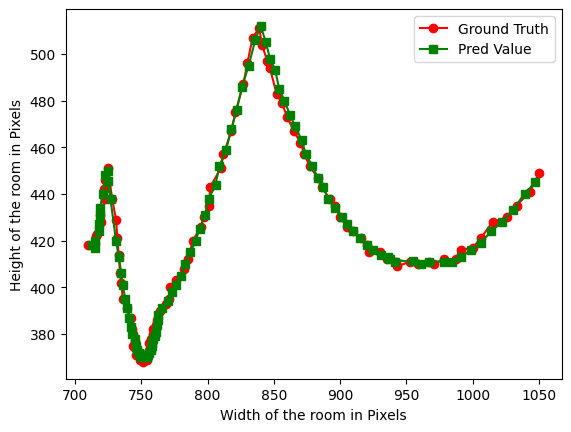

In [46]:
#plot the df13 coordinates along with the ground truth coordinates
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x13, y13, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [48]:
df14 = pd.read_csv('newyolov8v2.csv'    )
x14 = df14['bbox_x']
y14 = df14['bbox_y']

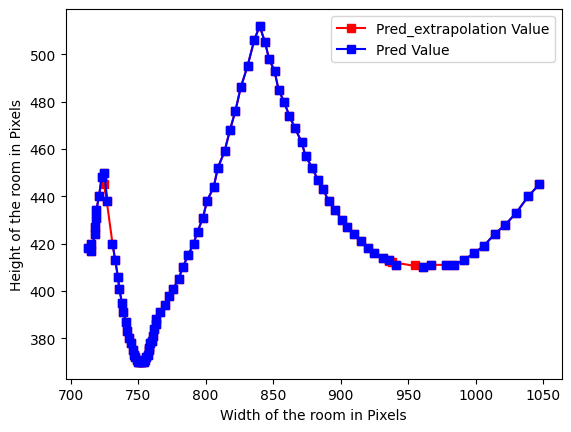

In [51]:
#plot the df14 coordinates along with the df13 coordinates and the ground truth coordinates
from matplotlib import markers
# plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x13, y13, marker='s', color='red', label='Pred_extrapolation Value')
plt.plot(x14, y14, marker='s', color='blue', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()


#Physics Model prediction plot and visualization

In [5]:
df15 = pd.read_csv('pred_pos2.csv')
df15

,x,y
0,718.0,421.00545
1,724.0,427.00545
2,723.0,428.00545
3,724.0,432.00545
4,727.0,437.00545
...,...,...
95,1014.0,427.00545
96,1021.0,432.00545
97,1032.0,436.00545
98,1037.0,440.00545


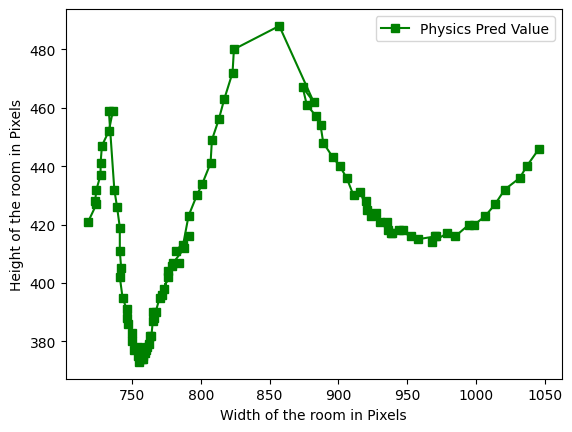

In [6]:
#plot the df15 coordinates
x15 = df15['x']
y15 = df15['y']
from matplotlib import markers
plt.plot(x15, y15, marker='s', color='green', label='Physics Pred Value')
# plt.plot(center_x, center_y, marker='o', color='red', label='Ground Truth')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [17]:
#calculate the center_x and center_y coordinates for ground truth
center_x = []
center_y = []
for i in range(len(x1)):
    center_x.append(x1[i] + 0.5 *width[i] )
    center_y.append(y1[i] + 0.5 * height[i])

In [23]:
count = 0
for i in range(len(x1)):
    predicted_coordinates15 = list(zip(x15,y15))
    ground_coordinates = list(zip(center_x,center_y))
    count += 1

In [24]:
error24 = avg_displacement_error(predicted_coordinates15, ground_coordinates)
error25 = avg_mahalanobis_distance(predicted_coordinates15, ground_coordinates)
print('ADE for physics is:', error24, 'and AMD for physics is:', error25)

ADE for physics is: 13.602338261445553 and AMD for physics is: 0.5225212073360682


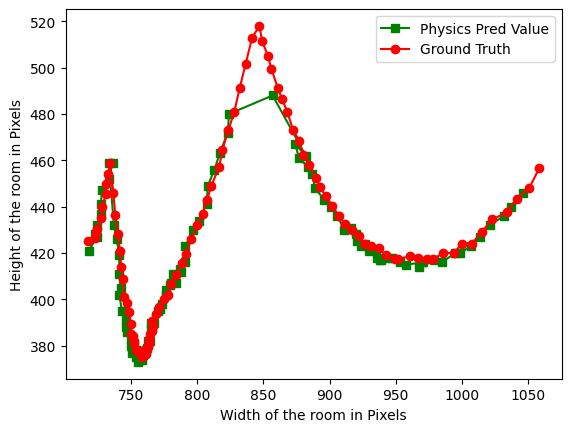

In [19]:
#plot the center_x and center_y coordinates for ground truth
from matplotlib import markers
plt.plot(x15, y15, marker='s', color='green', label='Physics Pred Value')
plt.plot(center_x, center_y, marker='o', color='red', label='Ground Truth')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()